 # 1 . **How do you create a simple perceptron for basic binary classification!**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Generate synthetic data for binary classification

np.random.seed(42)
X = np.random.rand(500, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Class 1 if sum of features > 1, else Class 0


In [4]:
# Split data into training and testing sets

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
# Create a simple perceptron model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)


y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:, accuracy : {accuracy : 2f}")

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6094 - loss: 0.6538
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5814 - loss: 0.6590  
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 0.6567 
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.6620 
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6120 - loss: 0.6558 
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.6603 
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.6580 
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6489 - loss: 0.6403 
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.6511 
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.6386 
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6144 - loss: 0.6537 
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# 2. How can you build a neural network with one hidden layer using Keras!

In [7]:

# Create a Sequential model
input_dim = 2
model = Sequential([
    Dense(16,activation='relu',input_shape=(input_dim,)),
    Dense(1,activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

# 3 . How do you initialize weights using the Xavier (Glorot) initialization method in Keras ?

In [8]:
from tensorflow.keras.initializers import GlorotUniform

# create the model

model = Sequential([
    Dense(64,activation='relu',input_shape=(input_dim,),kernel_initializer=GlorotUniform(),name='hidden_layer'),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform(),name = 'output_layer')


])



# compil model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:, accuracy : {accuracy : 2f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Accuracy:, accuracy :  0.430000


# 4 . How can you apply different activation functions in a neural network in Keras ?

In [9]:
# create a Sequential model

model = Sequential([
    # RELU
    Dense(64,activation='relu',name = 'input_layer'),
    # TANH
    Dense(128,activation='tanh',name = 'hidden_layer  1'),
    Dropout(0.2),
    # LEAKY_RELU
    Dense(64,activation='leaky_relu',name = 'hidden_layer  2'),
    # SOFTMAX
    Dense(10,activation='softmax' , name = 'output_layer')

])


# compile the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer  1 (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer  2 (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 5 . How do you add dropout to a neural network model to prevent overfitting ?

In [10]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(input_dim,),name = 'input_layer'),
    Dense(128,activation='tanh',name = 'hidden_layer  1'),

    # Adding Dropout Leayer
    Dropout(0.2),

    Dense(64,activation='leaky_relu',name = 'hidden_layer  2'),
    Dense(10,activation='softmax' , name = 'output_layer')


    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 6.  How do you manually implement forward propagation in a simple neural network ?

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def softmax(x):
  exp_x = np.exp(x-np.max(x))
  return exp_x / np.sum(axis=0, keepdims=True)


def forward_propagation(X, weights , biases):


  Activation = [X]



  for w , b in zip(weights,biases):
    z = np.dot(w,Activation[-1]) + b
    a = sigmoid(z)
    Activation.append(sigmoid(a))

  return Activation


X = np.array([[0.5, 0.2],
              [0.1,0.4],
              [0.7,0.9]])


weights  = [
    np.random.randn(4,3),
    np.random.randn(2,4),

]

biases = [
    np.random.randn(4,1),
    np.random.randn(2,1)
]





Activation = forward_propagation(X,weights,biases)

print(Activation)

[array([[0.5, 0.2],
       [0.1, 0.4],
       [0.7, 0.9]]), array([[0.68163269, 0.66509473],
       [0.65612249, 0.66608924],
       [0.65130473, 0.64444274],
       [0.56190919, 0.59694832]]), array([[0.55763797, 0.55883602],
       [0.63099309, 0.63147308]])]


# 7 . How do you add batch normalization to a neural network model in Keras ?

In [16]:
model  = Sequential ([
      Dense(64,input_shape=(100,),activation=None),
      BatchNormalization(),
      Activation('relu'),

      Dense(32,activation=None),
      BatchNormalization(),
      Activation('relu'),


      Dense(10,activation='softmax')
])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,258 (36.16 KB)

 Trainable params: 9,066 (35.41 KB)

 Non-trainable params: 192 (768.00 B)

# 8 . How can you visualize the training process with accuracy and loss curves ?

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5569 - loss: 0.6901 - val_accuracy: 0.7650 - val_loss: 0.5647
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.5039 - val_accuracy: 0.8300 - val_loss: 0.4841
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.4333 - val_accuracy: 0.8300 - val_loss: 0.4406
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3857 - val_accuracy: 0.8350 - val_loss: 0.4106
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.3207 - val_accuracy: 0.8500 - val_loss: 0.3930
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3524 - val_accuracy: 0.8500 - val_loss: 0.3825
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.3182 - val_accuracy: 0.8500 - val_loss: 0.3747
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8960 - loss: 0.3054 - val_accuracy: 0.8550 - val_loss

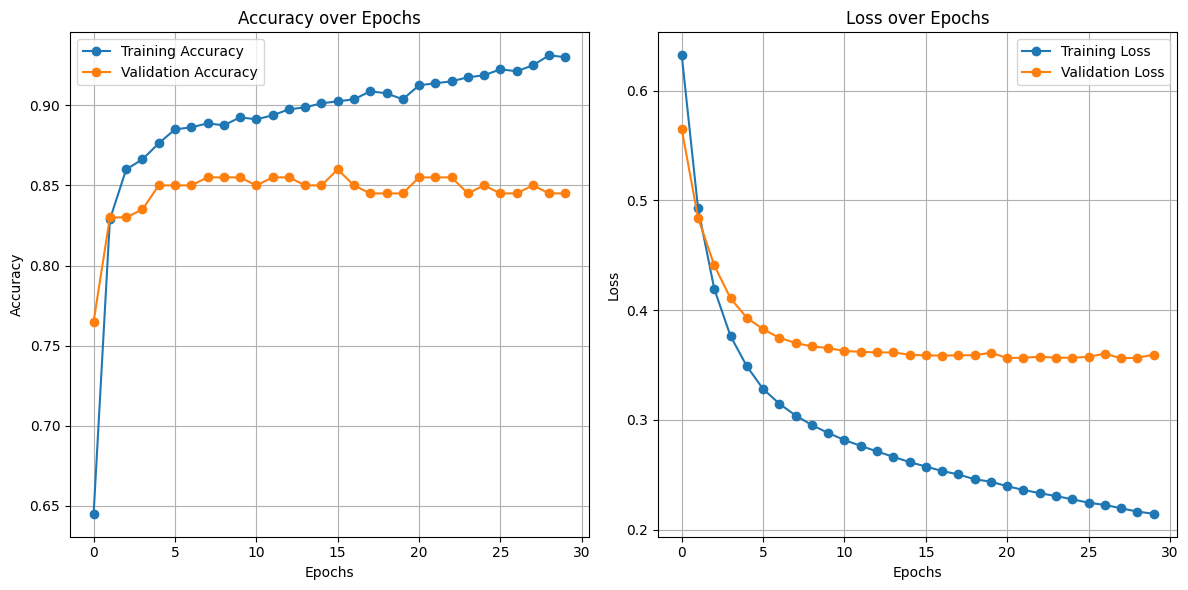

In [18]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#  9 .  How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients ?

In [20]:

from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

# Use an optimizer with gradient clipping by norm
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Clip gradients by norm

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Example data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5888 - loss: 0.6658 - val_accuracy: 0.7500 - val_loss: 0.5781
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 0.5378 - val_accuracy: 0.8350 - val_loss: 0.4976
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4482 - val_accuracy: 0.8250 - val_loss: 0.4494
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.4006 - val_accuracy: 0.8350 - val_loss: 0.4169
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3858 - val_accuracy: 0.8400 - val_loss: 0.3948
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3403 - val_accuracy: 0.8400 - val_loss: 0.3784
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8788 - loss: 0.3201 - val_accuracy: 0.8400 - val_loss: 0.3712
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8816 - loss: 0.3149 - val_accuracy: 0.8400 - val_loss

# 10 . How can you create a custom loss function in Keras ?

In [21]:
## Mean Square Error

def custom_mse(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [22]:
##  Weighted Binary Crossentropy


def weighted_binary_crossentropy(y_true, y_pred):
    weight = 2.0  # Example: Give more importance to positive class
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_mean(bce * weight)


In [23]:
## Huber Loss

def custom_huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = tf.square(error) / 2
    big_error_loss = delta * (tf.abs(error) - delta / 2)
    return tf.reduce_mean(tf.where(is_small_error, small_error_loss, big_error_loss))


## 11 .  How can you visualize the structure of a neural network model in Keras?

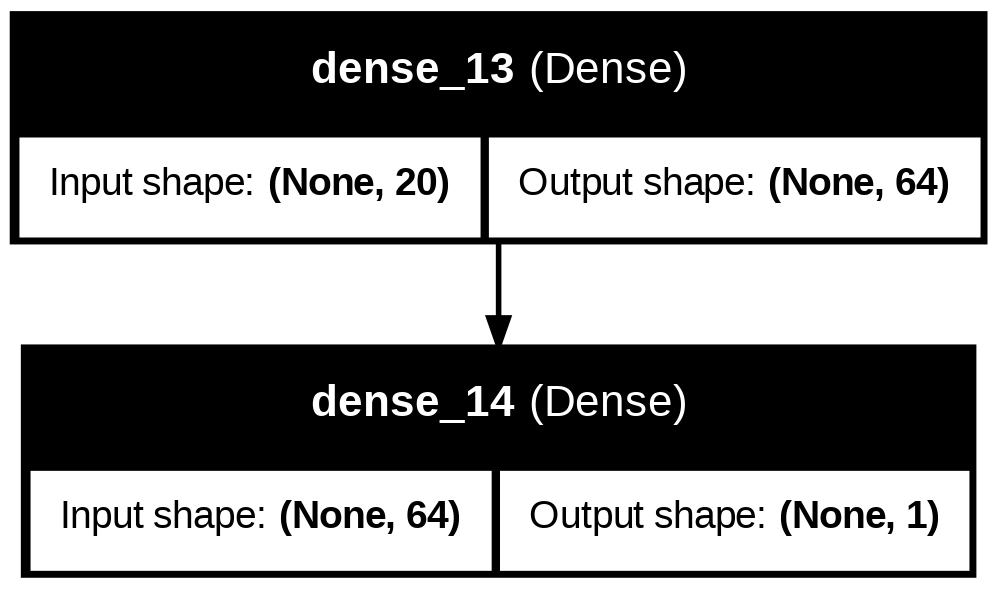

In [24]:
from tensorflow.keras.utils import plot_model

# Save and visualize the model structure
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [25]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model with the callback
model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])

# Launch TensorBoard
# Run this in your terminal:
# tensorboard --logdir logs/fit


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9122 - loss: 0.2306
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9173 - loss: 0.2171
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9126 - loss: 0.2195
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9449 - loss: 0.1785
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9286 - loss: 0.2028
